In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import data
df1 = pd.read_csv('Avocado.csv')
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
# avocado production volume in different regions - top 10 regions based on total volume of avacados
r_vol = df1.drop(columns=['Unnamed: 0','AveragePrice', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'])
region_volume = r_vol.groupby('region').sum().sort_values('Total Volume', ascending = False)[0:10]
region_volume

,Total Volume
region,
TotalUS,5.864740e+09
West,1.086779e+09
California,1.028982e+09
SouthCentral,1.011280e+09
Northeast,7.132809e+08
Southeast,6.152384e+08
GreatLakes,5.896425e+08
Midsouth,5.083494e+08
LosAngeles,5.078965e+08


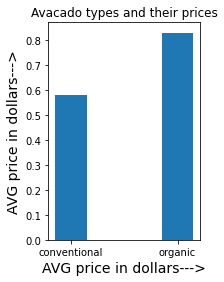

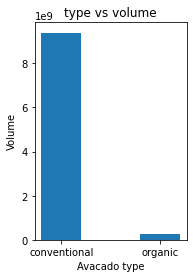

In [62]:
# avacados types
d = df1.loc[df1['region'] != 'TotalUS']
type_temp = d.groupby('type', as_index=False).sum('AveragePrice')
type_temp = type_temp.drop(columns=['Unnamed: 0','year', '4046' ,'4770' , '4225', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'])
type_ava = type_temp['type'].to_numpy()
type_avgcost = type_temp['AveragePrice'].to_numpy()

for i in range(0,2,1):
    type_avgcost[i] = type_avgcost[i]/(len(d)-1)

plt.subplot(1,2,1)
plt.bar(type_ava, type_avgcost, width=0.3)
plt.xlabel('AVG price in dollars--->', fontsize=14)
plt.ylabel('AVG price in dollars--->', fontsize=14)
plt.title('Avacado types and their prices')
plt.show()

plt.subplot(1,2,2)
plt.bar(type_ava, type_temp['Total Volume'], width=0.4)
plt.title('type vs volume')
plt.xlabel('Avacado type')
plt.ylabel('Volume')
plt.show()

# since the volume of organic avacados is less the average price of organic avacado is more

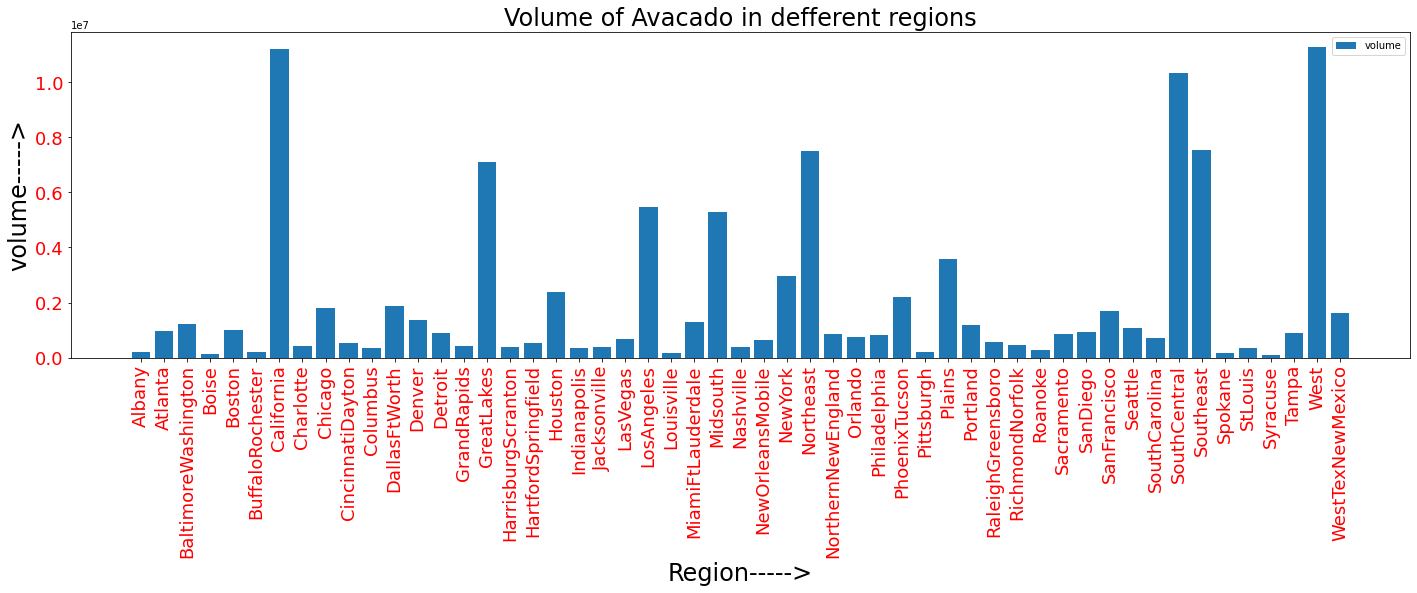

In [122]:
# volume analysis using graph

# removing totalUS data
df1 = df1[df1['region'] != 'TotalUS']

region = df1['region'].to_numpy()
volume = df1['Total Volume'].to_numpy()
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(6)

plt.bar(region, volume, label='volume')
plt.legend()
plt.xticks(rotation=90, fontsize=18, color='r')
plt.yticks(fontsize=18, color='r')
plt.xlabel('Region----->', fontsize=24)
plt.ylabel('volume----->', fontsize=24)
plt.title('Volume of Avacado in defferent regions', fontsize=24)
plt.show()

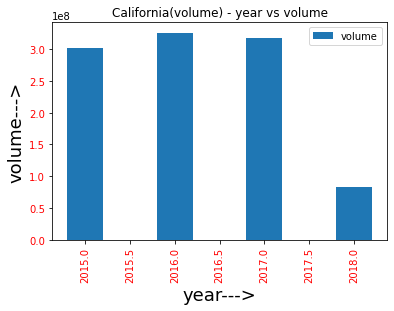

In [43]:
# from above bar plot we got to know that california produces largest amount of Avacados
# let us see during which year has largest volume

temp_df = df1.loc[(df1['region']=='California')]
california_vol = temp_df.groupby('year', as_index=False).sum('Total Volume')
california_vol = california_vol.drop(columns=['Unnamed: 0', 'AveragePrice', '4046' ,'4770' , '4225', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'])

plt.bar(california_vol['year'], california_vol['Total Volume'], label='volume', width=0.4)
plt.xlabel('year--->', fontsize=18)
plt.ylabel('volume--->', fontsize=18)
plt.legend()
plt.xticks(rotation=90, fontsize=10, color = 'r')
plt.yticks(fontsize=10, color='r')
plt.title('California(volume) - year vs volume')
plt.show()